# Изучение закономерностей, определяющих успешность игр.
В нашем распоряжении данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования**:
1. Выявить параметры, определяющие успешность игр в разных регионах мира.

**Ход исследования**
Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры 

Данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы получим из файла `\Programs\games.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки выявим возможность исправить самые критичные ошибки данных. В конце напишем общий вывод.
 
Таким образом, исследование пройдёт в несколько этапов:
 1. Изучение общей информации.
 2. Подготовка данных.
 3. Анализ данных.
 4. Определение портрета пользователя каждого региона. 
 5. Общий вывод.

### Исследование продаж видео игр интернет-магазина «Стримчик»
_____

###### Данное исследование разделим на несколько частей.

#### Часть 1. Обзор данных:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
#### Часть 2. Предобработка данных:
* [1. Стиль заголовков.](#2-bullet)
* [2. Пропуски значений.](#3-bullet)
#### Часть 3. Исследовательский анализ данных:
* [1. Количество игр в разные годы.](#4-bullet)
* [2. Топ платформ по продажам.](#5-bullet)
* [3. Анализ продаж топовых платформ.](#6-bullet)
* [4. Оценка влияния отзывов пользователей и критиков на продажи игр внутри одной популярной платформы.](#7-bullet)
* [5. Распределение продаж по жанрам.](#8-bullet)
#### Часть 4. Портрет пользователя каждого региона
* [1. Определение топ-5 популярных платформ для каждого региона.](#9-bullet)
* [2. Определение топ-5 популярных жанров для каждого региона.](#10-bullet)
* [3. Оценка влияния рейтинга ESRB на продажи в отдельном регионе.](#11-bullet)
#### Часть 5. Проверка гипотез
##### Итоги исследования

## Обзор данных

<a id='1-bullet'></a>
### Изучение файлов с данными, получение общей информации, загрузка библиотек.

In [1]:
import pandas as pd # импорт библиотеки pandas
import math #импорт библиотеки math
from scipy import stats as st #импорт библиотеки stats
import matplotlib.pyplot as plt #импорт библиотеки matplotlib.pyplot
import seaborn as sns

Прочитаем файл из папки /datasets и сохраним его переменную `df`:

In [2]:
df = pd.read_csv('D:\Programs\games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов. Тип данных в столбцах — `object` и `float64`. Сразу можно заметить, что формат года неправильный.

Согласно документации к данным:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Releas` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод

Столбец `Year_of_Releas` необходимо привести к типы `int`. В данных есть пропуски. Данные необходимо подготовить к анализу.

## Предобработка данных

<a id='2-bullet'></a>
### Стиль заголовков

Приведем название столбцов к нижнему регистру

In [4]:
df.columns = df.columns.str.lower() #приведение столбцов к нижнему регистру
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id='3-bullet'></a>
### Пропуски значений

Изменим тип данных у стобца `year_of_release` с `float` на `int`, так как это целочисленные значения. Столбец `user_score` также подлежит изменению, но так как помимо численных значений содержит `tbd`, что значит - игра подлежит определению, то перед изменением типов столбцов необходимо заменить `tbd` пропусками. Перед заменой необходимо обработать пропуски.

Так как пропущенных значений в столбце, обозначающий год игры, около 1%, то данные строки можно удалить.

In [5]:
df = df.dropna(subset=['year_of_release']) #удаление пропусков в столбце year_of_release

In [6]:
df['year_of_release'] = df['year_of_release'].astype('int') #изменение типа столбца

Посчитаем количество пропусков в данных.

In [7]:
df.isna().sum() # подсчёт пропусков

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

Две игры оказались без названия. Найдем в каких строках они находятся.

In [8]:
df[['name','genre']].isna().all(axis=1)[lambda x : x] # поиск строк с пропущенными значениями

659      True
14244    True
dtype: bool

Посмотрим на эти строки

In [9]:
df.loc[659] 

name                NaN
platform            GEN
year_of_release    1993
genre               NaN
na_sales           1.78
eu_sales           0.53
jp_sales            0.0
other_sales        0.08
critic_score        NaN
user_score          NaN
rating              NaN
Name: 659, dtype: object

In [10]:
df.loc[14244]

name                NaN
platform            GEN
year_of_release    1993
genre               NaN
na_sales            0.0
eu_sales            0.0
jp_sales           0.03
other_sales         0.0
critic_score        NaN
user_score          NaN
rating              NaN
Name: 14244, dtype: object

Судя по данным это старые игры, не имеющие рейтинга и с малыми продажами, поэтому их можно удалить.

In [11]:
df = df.drop(labels = [659,14244],axis = 0) #удаление строк

Заменим значения `tbd` в `user_score` пропусками:

In [12]:
df['user_score'] = df['user_score'].replace('tbd', None) #заполнение пропусков

In [13]:
df['user_score'] = df['user_score'].astype('float') #изменение типа столбца

Заменим пропуски в рейтинге игр значением `RP` - рейтинг ожидается.

In [14]:
df['rating'] = df['rating'].fillna('RP')

Пропуски в столбецах `critic_score` и `rating`,`user_score` невозможно заполнить

Посчитаем суммарные продажи в во всех регионах и запищем значение в новый столбец `sum_sales`

In [15]:
df['sum_sales'] = df['na_sales'] +df['eu_sales'] +df['jp_sales'] +df['other_sales'] #подсчет суммарных продаж

### Вывод

Данные готовы к анализу

## Исследовательский анализ данных

<a id='4-bullet'></a>
### Количество игр в разные годы.

Посмотрим сколько игр выпускалось в разные годы.

<AxesSubplot:title={'center':'Количество игр в разные годы'}, xlabel='Годы выпуска', ylabel='Количество игр'>

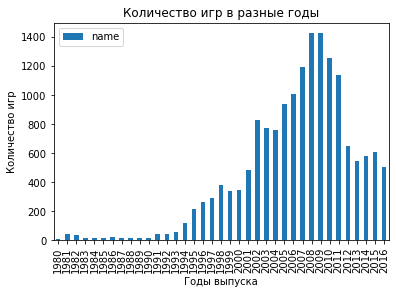

In [16]:
df.groupby('year_of_release').agg({'name':'count'}).reset_index().plot(x='year_of_release',y='name', kind='bar',title='Количество игр в разные годы',xlabel='Годы выпуска',ylabel='Количество игр') #построение гистограммы

По графику можно увидеть, что количество игр, выпущенные в 2008 и 2009 было максимальным за весь период.

<a id='5-bullet'></a>
### Топ платформ по продажам.

Составим топ платформ по продажам

In [17]:
df.groupby('platform').agg({'sum_sales':'sum'}).sort_values('sum_sales',ascending=False) #группировка и сортировка

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<a id='6-bullet'></a>
### Анализ продаж топовых платформ.

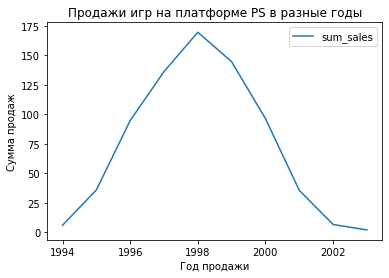

In [18]:
df.query('platform == "PS"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе PS в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

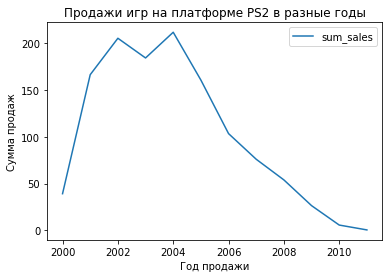

In [19]:
df.query('platform == "PS2"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе PS2 в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

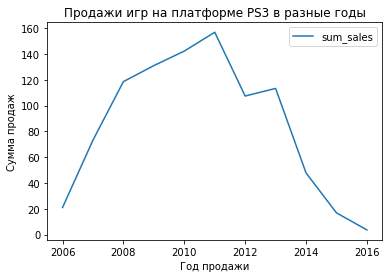

In [20]:
df.query('platform == "PS3"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе PS3 в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

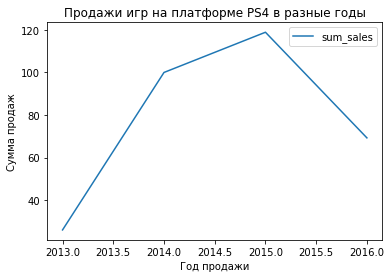

In [21]:
df.query('platform == "PS4"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе PS4 в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

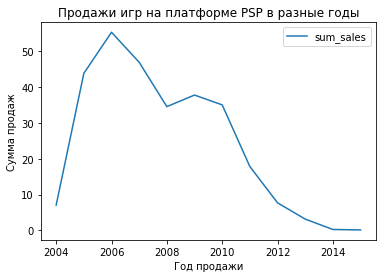

In [22]:
df.query('platform == "PSP"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе PSP в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

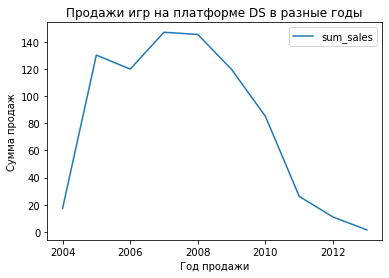

In [23]:
df.query('platform == "DS" and year_of_release>2000').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе DS в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

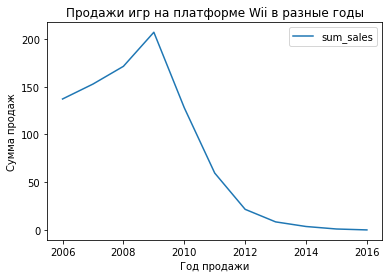

In [24]:
df.query('platform == "Wii"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе Wii в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

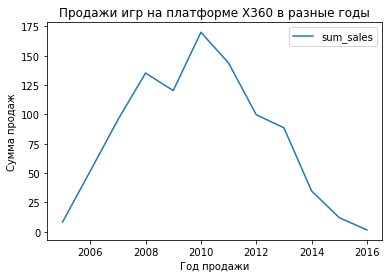

In [25]:
df.query('platform == "X360"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе X360 в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

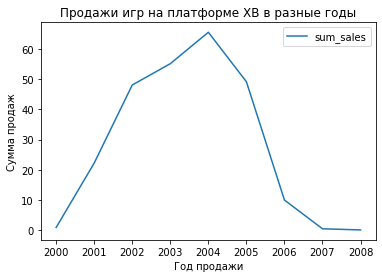

In [26]:
df.query('platform == "XB"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе XB в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

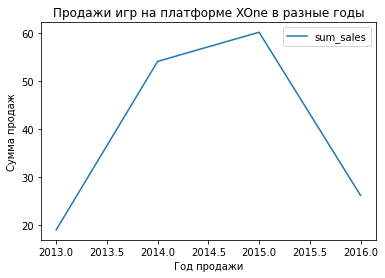

In [27]:
df.query('platform == "XOne"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе XOne в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

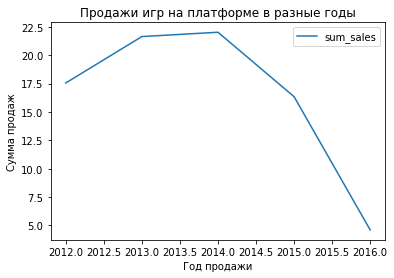

In [28]:
df.query('platform == "WiiU"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

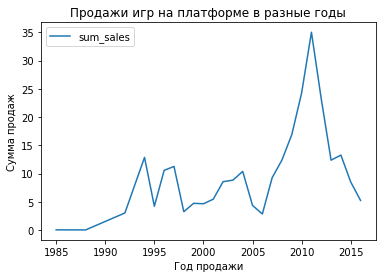

In [29]:
df.query('platform == "PC"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

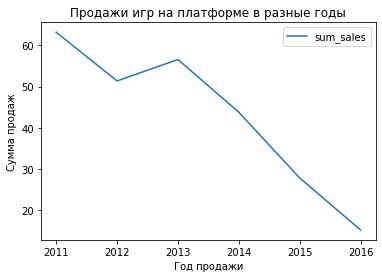

In [30]:
df.query('platform == "3DS"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

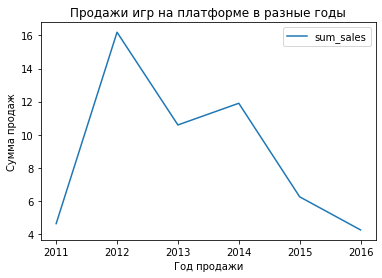

In [31]:
df.query('platform == "PSV"').groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index().plot(x='year_of_release',y='sum_sales')#группировка и построение графика
plt.title('Продажи игр на платформе в разные годы')
plt.xlabel('Год продажи')
plt.ylabel('Сумма продаж')
plt.show()

Судя по графикам новые платформы появляются раз в 6 лет. Последнее обновление топовых платформ происходило начиная с 2012 года, поэтому актуальный период будем считать с 2012 по 2016 год. построим срез данных.

In [32]:
df=df.query('year_of_release>=2012') #срез по году выпуска

In [33]:
df.groupby('platform').agg({'sum_sales':'sum'}).sort_values('sum_sales',ascending=False)#группировка и сортировка

,sum_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


По графикам можно выделить лидирующие и растущие платформы: PS4, XOne, WiiU . Платформы 3DS, PC, PSV, PS3 показывают отрицательный рост. 

Построим 'ящик с усами' по глобальным продажам игр в разбивке по платформам. 

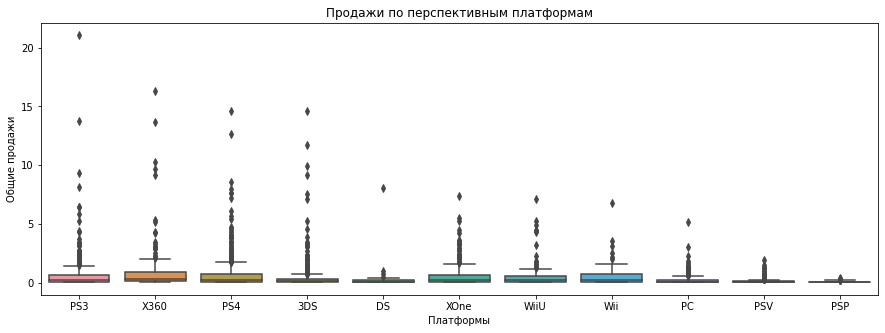

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='platform', y='sum_sales')
plt.title('Продажи по перспективным платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

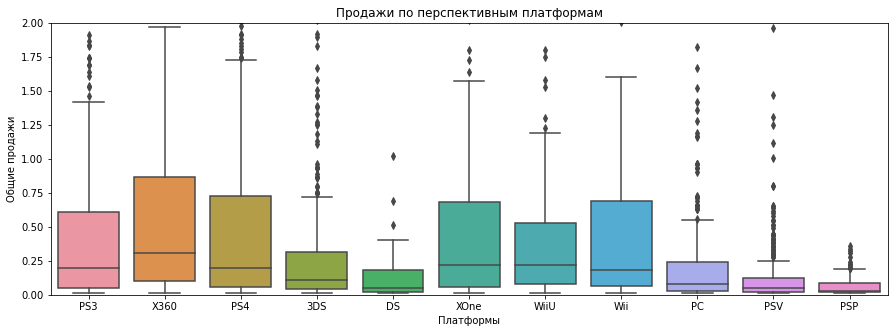

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='platform', y='sum_sales')
plt.title('Продажи по перспективным платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи') #построение ящика с усами
plt.ylim(0,2) #ограничение области
plt.show()

Можно сказать, что платформы PS3, X360, PS4, XOne, WiiU, Wii имеют стабильно высокие продажи, так как их медианные продажи выше, чем у других платформ.

<a id='7-bullet'></a>
### Оценка влияния отзывов пользователей и критиков на продажи игр внутри одной популярной платформы.  

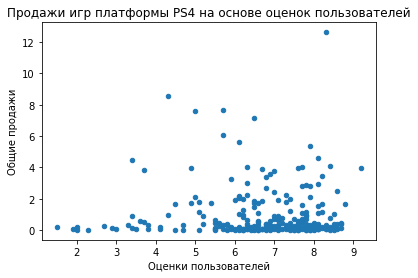

In [36]:
df.query('platform == "PS4"').plot(x='user_score', y='sum_sales', kind='scatter')#построение графика
plt.title('Продажи игр платформы PS4 на основе оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Общие продажи')
plt.show()

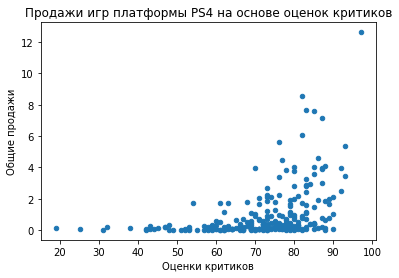

In [37]:
df.query('platform == "PS4"').plot(x='critic_score', y='sum_sales', kind='scatter')#построение графика
plt.title('Продажи игр платформы PS4 на основе оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.show()

In [38]:
df.query('platform == "PS4"')['critic_score'].corr(df.query('platform == "PS4"')['sum_sales']) #коэффициент корреляции

0.40656790206178123

In [39]:
df.query('platform == "PS4"')['user_score'].corr(df.query('platform == "PS4"')['sum_sales']) #коэффициент корреляции

-0.03195711020455644

Между отзывами игроков и продажами игр есть очень слабая отрицательная связь, а между отзывами критиков и продажами игр есть слабая связь на платформе PS4.

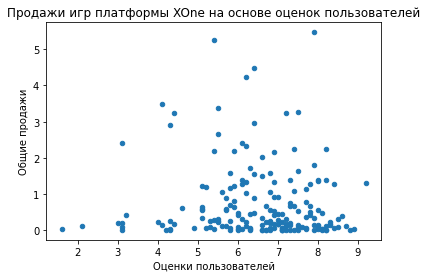

In [40]:
df.query('platform == "XOne"').plot(x='user_score', y='sum_sales', kind='scatter')#построение графика
plt.title('Продажи игр платформы XOne на основе оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Общие продажи')
plt.show()

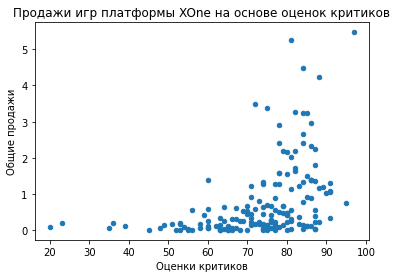

In [41]:
df.query('platform == "XOne"').plot(x='critic_score', y='sum_sales', kind='scatter')#построение графика
plt.title('Продажи игр платформы XOne на основе оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.show()

In [42]:
df.query('platform == "XOne"')['critic_score'].corr(df.query('platform == "XOne"')['sum_sales']) #коэффициент корреляции

0.41699832800840153

In [43]:
df.query('platform == "XOne"')['user_score'].corr(df.query('platform == "XOne"')['sum_sales']) #коэффициент корреляции

-0.06892505328279418

Между отзывами игроков и продажами игр есть очень слабая отрицательная связь, и между отзывами критиков и продажами игр есть слабая связь на платформе PS4.

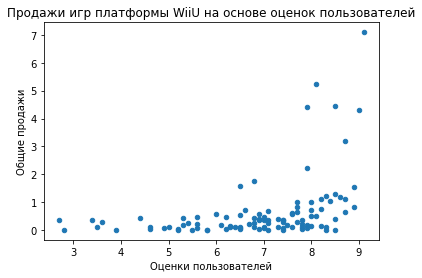

In [44]:
df.query('platform == "WiiU"').plot(x='user_score', y='sum_sales', kind='scatter')#построение графика
plt.title('Продажи игр платформы WiiU на основе оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Общие продажи')
plt.show()

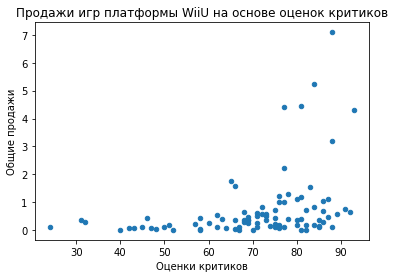

In [45]:
df.query('platform == "WiiU"').plot(x='critic_score', y='sum_sales', kind='scatter')#построение графика
plt.title('Продажи игр платформы WiiU на основе оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.show()

In [46]:
df.query('platform == "WiiU"')['critic_score'].corr(df.query('platform == "WiiU"')['sum_sales']) #коэффициент корреляции

0.34837976012017496

In [47]:
df.query('platform == "WiiU"')['user_score'].corr(df.query('platform == "WiiU"')['sum_sales']) #коэффициент корреляции

0.40021902021486194

Между отзывами критиков, пользователей и продажами игр есть слабая положительная связь на платформе WiiU.

<a id='8-bullet'></a>
### Распределение продаж по жанрам.

Далее рассмотрим распределение продаж по жанрам

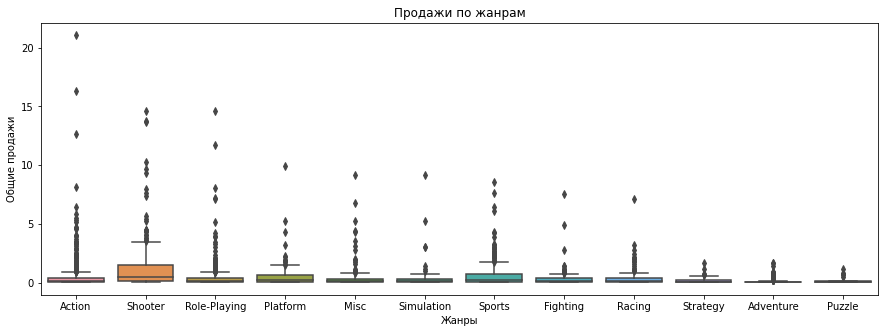

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='genre', y='sum_sales')
plt.title('Продажи по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')
plt.show()

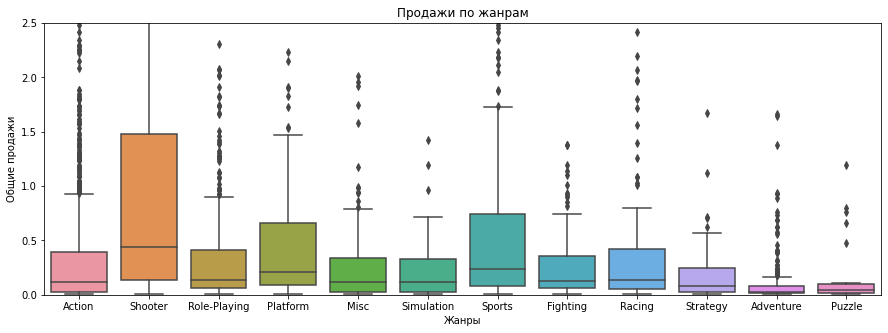

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='genre', y='sum_sales')
plt.title('Продажи по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')
plt.ylim(0,2.5) #ограничение области
plt.show()

Исходя из медианных продаж лидерами по продажам являются жанры `Platform`, `Shooter` и `Sports`. Самые низкие продажи у игр жанра `Adventure` и `Puzzle`.

### Вывод

Исходя из исследовательского анализа данных, можно сказать, что самые популярные платформы это  `PS4`, `XOne`, `WiiU`. Самые популярные жанры: `Platform`, `Shooter` и `Sports`.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<a id='9-bullet'></a>
### Определение топ-5 популярных платформ для каждого региона.

In [50]:
platform_na=df.groupby('platform').agg({'na_sales':'sum'}).reset_index() #группировка
platform_na['platform'] = platform_na['platform'].where(platform_na['na_sales'].isin(platform_na['na_sales'].nlargest(5)), 'Other')
platform_na=platform_na.groupby('platform').agg({'na_sales':'sum'}).reset_index()

In [51]:
platform_eu=df.groupby('platform').agg({'eu_sales':'sum'}).reset_index() #группировка
platform_eu['platform'] = platform_eu['platform'].where(platform_eu['eu_sales'].isin(platform_eu['eu_sales'].nlargest(5)), 'Other')
platform_eu=platform_eu.groupby('platform').agg({'eu_sales':'sum'}).reset_index()

In [52]:
platform_jp=df.groupby('platform').agg({'jp_sales':'sum'}).reset_index() #группировка
platform_jp['platform'] = platform_jp['platform'].where(platform_jp['jp_sales'].isin(platform_jp['jp_sales'].nlargest(5)), 'Other')
platform_jp=platform_jp.groupby('platform').agg({'jp_sales':'sum'}).reset_index()

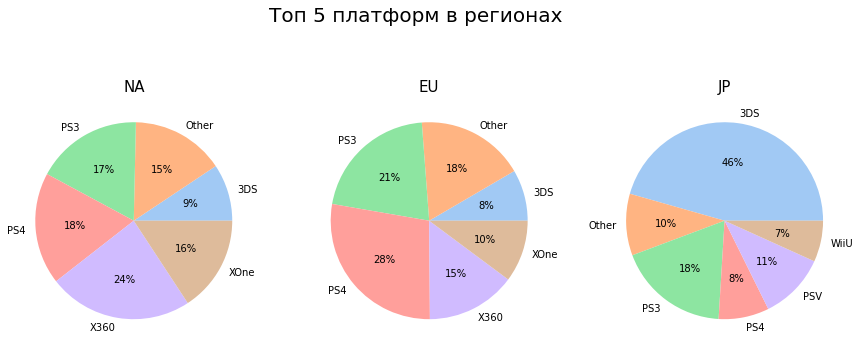

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,10),)
colors = sns.color_palette('pastel')[0:6]
fig.suptitle("Топ 5 платформ в регионах",y=0.8,
             fontsize = 20)
ax1.pie(platform_na['na_sales'], colors=colors, labels=platform_na['platform'],autopct='%.0f%%',
      frame=False)
ax1.set_title('NA',fontsize = 15) 
ax2.pie(platform_eu['eu_sales'], colors=colors, labels=platform_eu['platform'],autopct='%.0f%%',
      frame=False)
ax2.set_title('EU',fontsize = 15) 
ax3.pie(platform_jp['jp_sales'], colors=colors, labels=platform_jp['platform'],autopct='%.0f%%',
      frame=False)
ax3.set_title('JP',fontsize = 15) 
plt.show()

В целом, в Европе и Америке популярны одинаковые платформы. Однако, в Японии помимо PS3 и PS4 также популярны платформы фирмы Nintendo: WiiU и 3DS. Причем, 3DS самая популярная платформа.

<a id='10-bullet'></a>
### Определение топ-5 популярных жанров для каждого региона.

In [54]:
genre_na=df.groupby('genre').agg({'na_sales':'sum'}).reset_index() #группировка
genre_na['genre'] = genre_na['genre'].where(genre_na['na_sales'].isin(genre_na['na_sales'].nlargest(5)), 'Other')
genre_na=genre_na.groupby('genre').agg({'na_sales':'sum'}).reset_index()

In [55]:
genre_eu=df.groupby('genre').agg({'eu_sales':'sum'}).reset_index() #группировка
genre_eu['genre'] = genre_eu['genre'].where(genre_eu['eu_sales'].isin(genre_eu['eu_sales'].nlargest(5)), 'Other')
genre_eu=genre_eu.groupby('genre').agg({'eu_sales':'sum'}).reset_index()

In [56]:
genre_jp=df.groupby('genre').agg({'jp_sales':'sum'}).reset_index() #группировка
genre_jp['genre'] = genre_jp['genre'].where(genre_jp['jp_sales'].isin(genre_jp['jp_sales'].nlargest(5)), 'Other')
genre_jp=genre_jp.groupby('genre').agg({'jp_sales':'sum'}).reset_index()

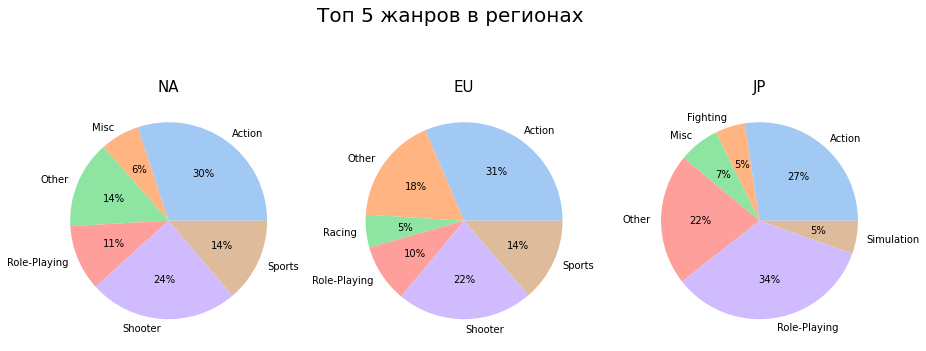

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,10),)
colors = sns.color_palette('pastel')[0:6]
fig.suptitle("Топ 5 жанров в регионах",y=0.8,
             fontsize = 20)
ax1.pie(genre_na['na_sales'], colors=colors, labels=genre_na['genre'],autopct='%.0f%%',
      frame=False)
ax1.set_title('NA',fontsize = 15) 
ax2.pie(genre_eu['eu_sales'], colors=colors, labels=genre_eu['genre'],autopct='%.0f%%',
      frame=False)
ax2.set_title('EU',fontsize = 15) 
ax3.pie(genre_jp['jp_sales'], colors=colors, labels=genre_jp['genre'],autopct='%.0f%%',
      frame=False)
ax3.set_title('JP',fontsize = 15) 
plt.show()

В Европе и Америке популярны одинаковые платформы. Различие лишь одно - в Америке популярен жанр `Misc`, а в Европе `Racing`. В Японии же лидирует `Role-Playing`, а жанр `Action` занимает лишь вторую строчку рейтинга. Помимо этого, популярны также жанры `Simulation` и `Fighting`, что не пользуется популярностью в Европе и Америке.

<a id='11-bullet'></a>
### Оценка влияния рейтинга ESRB на продажи в отдельном регионе.

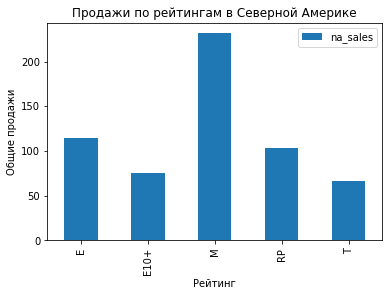

In [58]:
df.groupby('rating').agg({'na_sales':'sum'}).reset_index().plot(x='rating',y='na_sales', kind='bar') #построение гистограммы
plt.title('Продажи по рейтингам в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Общие продажи')
plt.show()

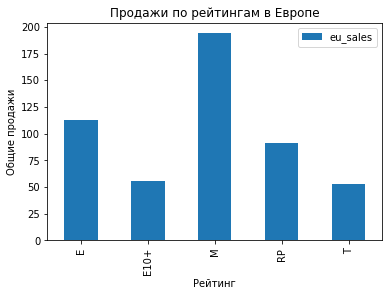

In [59]:
df.groupby('rating').agg({'eu_sales':'sum'}).reset_index().plot(x='rating',y='eu_sales', kind='bar') #построение гистограммы
plt.title('Продажи по рейтингам в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Общие продажи')
plt.show()

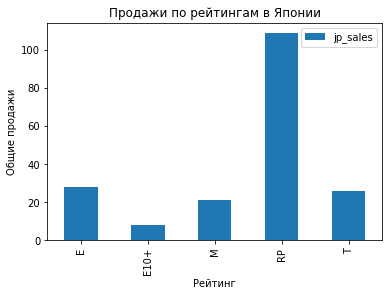

In [60]:
df.groupby('rating').agg({'jp_sales':'sum'}).reset_index().plot(x='rating',y='jp_sales', kind='bar') #построение гистограммы
plt.title('Продажи по рейтингам в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Общие продажи')
plt.show()

В Европе и Америке лучше всех продаются игры с рейтингом `M`, другие , в целом, продаются одинаково. В Японии же нельзя с точностью сказать, игры с каким рейтингом продаются лучше. Так как у многих игр в Японском регионе нет рейтинга `ESRB`, потому что он предназначен для маркировки игр для США и Канады.

### Вывод

Портрет пользователя из Америки и Европы, в целом, одинаковый. Им нравятся те же платформы и жанры игр. Возрастной рейтинг игр влияет на продажи в этих регионах одинаково. В Японии же портрет пользователя совершенно другой. Типичному пользователю из Японии нравятся подвижные игры, а влияние рейтинга ESRB определить не удалось, так как в этом регионе много игр с пропущенным рейтингом.

## Проверка гипотез

Проверим некоторые гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим первую гипотезу. Нулевая гипотеза будет выглядеть следующим образом: средние двух генеральных совокупностей равны между собой. Алтернативная: средние двух генеральных совокупностей не равны между собой. Чтобы подтвердить или опровергнуть нулевую гипотезу проведем t-тест для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам.

Перед проверкой необходимо удалить строки, в которых отсутствуют значения в столбцах `user_score`.

In [61]:
df_score = df.dropna(subset=['user_score']) #построение гистограммы

In [62]:
results=st.ttest_ind(
    df_score.query('platform=="XOne"')['user_score'], 
    df_score.query('platform=="PC"')['user_score'])
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 57%. Не получилось опровергнуть нулевую гипотезу.

In [63]:
(df_score.query('platform=="XOne"')['user_score'].mean() / df_score.query('platform=="PC"')['user_score'].mean()) - 1

0.014433501256728709

Средняя выручка у `XOne` всего на 1 процент больше, чем `PC`.

Далее проверим следующую гипотезу. Нулевая гипотеза: средние двух генеральных совокупностей равны между собой. Алтернативная: средние двух генеральных совокупностей не равны между собой. Чтобы подтвердить или опровергнуть нулевую гипотезу проведем t-тест для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам.

In [64]:
results=st.ttest_ind(
    df_score.query('genre=="Action"')['user_score'], 
    df_score.query('genre=="Sports"')['user_score'])
alpha = 0.01
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


In [65]:
(df_score.query('genre=="Action"')['user_score'].mean() / df_score.query('genre=="Sports"')['user_score'].mean()) - 1

0.2509486993361323

Средняя выручка у жанра `Action` на 23 процента больше, чем у жанра `Sports`.

p-значение получилось меньше, чем критический уровень статистической значимости alpha. На имеющихся данных, на уровне значимости 1% (уровне доверия 99%) есть оснований отвергнуть нулевую гипотезу в пользу альтернативы.

### Вывод

На основе двух проведенных тестов, можно утверждать, что нельзя опровергнуть гипотезы, выдвенутые в начале этого пункта.

## Вывод

В Америке следует рекламировать игры на платформе `XOne`и`PS4`  с жанром `Action` и `Shooter` рейтингом `M`.
В Европе популярны игры на платформе `PS4` в жанре `Action` и `Shooter` рейтингом `M`.
В Японии больше всего пользуются спросом игры на платформе `3Ds` в жанре `Action` и `Role-Playing`.
На отзывы пользователей не стоит обращать внимания, но к отзывам критиков стоит иногда прислушаться.